In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [145]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\djroc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [137]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\djroc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
df=pd.read_csv("C:/Users/djroc/OneDrive/Desktop/tweets.csv")

In [3]:
df.shape

(14640, 15)

In [4]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,11:35:52,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,11:15:59,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,11:15:48,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,11:15:36,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,11:14:45,NaN,Pacific Time (US & Canada)


In [37]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.drop(['airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord'],inplace=True,axis=1)

In [6]:
df.iloc[10:15,:]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,tweet_location,user_timezone
10,5.702940e+17,neutral,0.6769,NaN,0.0,Virgin America,@VirginAmerica did you know that suicide is th...,10:48:24,1/1 loner squad,Eastern Time (US & Canada)
11,5.702900e+17,positive,1.0000,NaN,NaN,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,10:30:40,NYC,America/New_York
12,5.702900e+17,positive,1.0000,NaN,NaN,Virgin America,@VirginAmerica This is such a great deal! Alre...,10:30:06,NYC,America/New_York
13,5.702870e+17,positive,0.6451,NaN,NaN,Virgin America,@VirginAmerica @virginmedia I'm flying your #f...,10:21:28,NaN,Eastern Time (US & Canada)
14,5.702860e+17,positive,1.0000,NaN,NaN,Virgin America,@VirginAmerica Thanks!,10:15:29,"San Francisco, CA",Pacific Time (US & Canada)


In [57]:
#df['negativereason_confidence']=df.negativereason_confidence.fillna(0)
df.negativereason_confidence.isnull().sum()

0

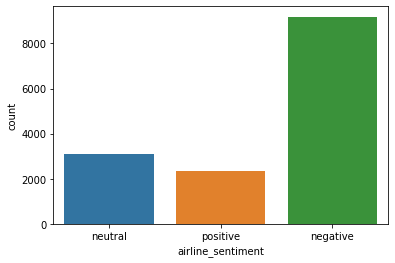

In [7]:
#most tweets are negative
sn.countplot(x='airline_sentiment',data=df)

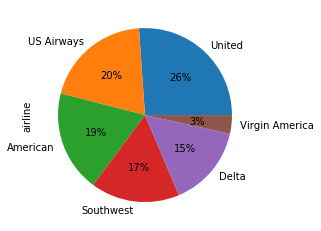

In [9]:
#most tweets are for united airlines followed by US airways and then american
df.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')

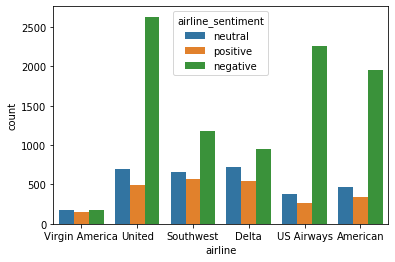

In [10]:
sn.countplot(hue='airline_sentiment',x='airline',data=df)

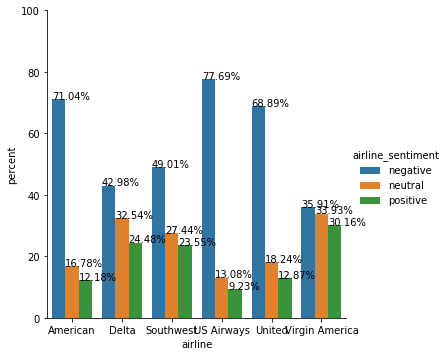

In [17]:
#all three airline_sentiments for virgin america are very close to ach other or in almost equal ratio
#among all the airlines negative tweets are more than positive and negative tweets
x,y = 'airline' , 'airline_sentiment'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sn.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [18]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

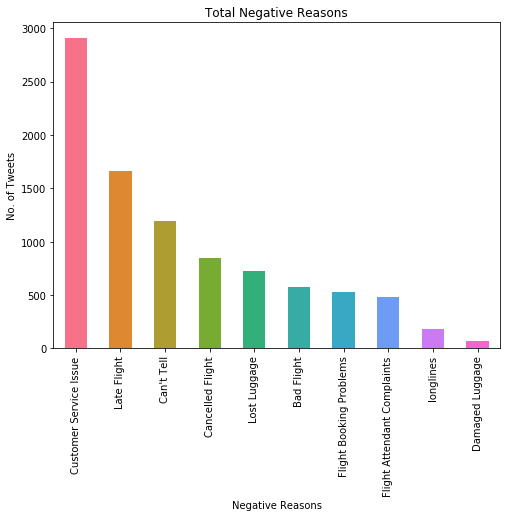

In [26]:
#Plotting all the negative reasons 
color=sn.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)


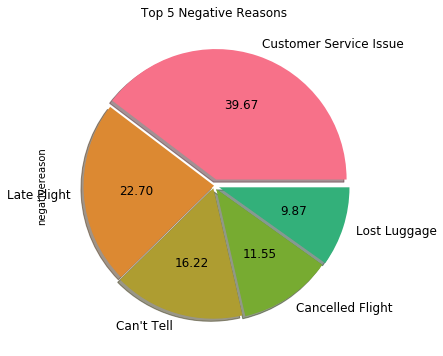

In [27]:
color=sn.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

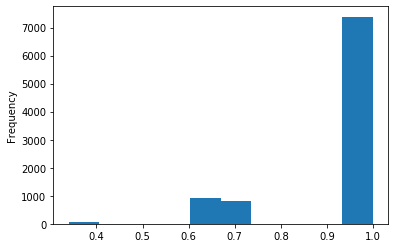

In [119]:
#The confidence intervals of negative tweets are mostly in range 0.92-1
df[df['airline_sentiment']=='negative'].airline_sentiment_confidence.plot(kind='hist')

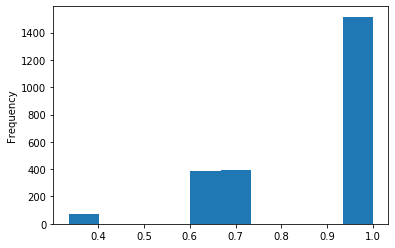

In [120]:
#The confidence intervals of positive tweets are mostly in range 0.92-1
df[df['airline_sentiment']=='positive'].airline_sentiment_confidence.plot(kind='hist')

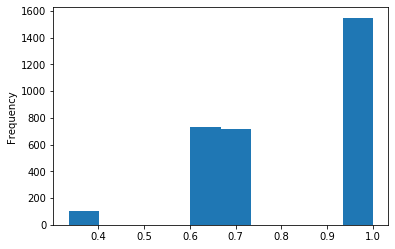

In [121]:
#The confidence intervals of neutral tweets are mostly in range 0.92-1
df[df['airline_sentiment']=='neutral'].airline_sentiment_confidence.plot(kind='hist')

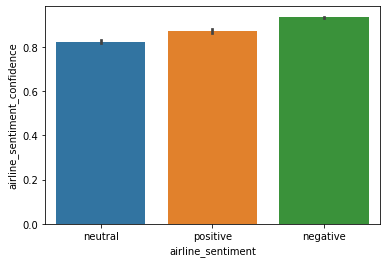

In [125]:
#avg confidence interval for negative tweets is highest
sn.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=df)

In [38]:
air_senti=pd.crosstab(df.airline,df.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [39]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


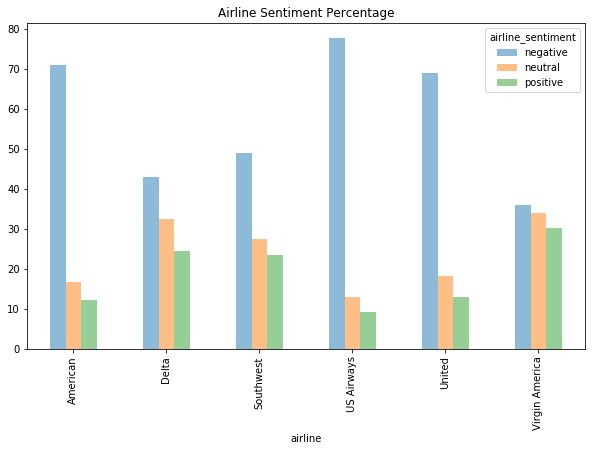

In [31]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,title="Airline Sentiment Percentage")


In [40]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['date_created']=df['tweet_created'].dt.date
df['date_created'].head(5)

0    2021-04-11
1    2021-04-11
2    2021-04-11
3    2021-04-11
4    2021-04-11
Name: date_created, dtype: object

In [49]:
df2 = df.groupby(['date_created','airline'])
df2 = df2.airline_sentiment.value_counts()
df2.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2021-04-11   American            1960      463       336
             Delta                955      723       544
             Southwest           1186      664       570
             US Airways          2263      381       269
             United              2633      697       492
             Virgin America       181      171       152

In [7]:
df['negativereason']=df.negativereason.fillna(" ")

In [8]:
df['tweet_updated']=df['negativereason']+" "+df["text"]

In [9]:
for i in range (0,len(df['tweet_updated'])):
    df['tweet_updated'][i]=df['tweet_updated'][i].lstrip(" ")

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
for i in range(0,len(df['tweet_updated'])):
          df['tweet_updated'][i] = re.sub(r'\^[a-zA-Z]\s+', ' ',df['tweet_updated'][i]) 

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# TEXT PREPROCESSING

In [11]:
features=df['tweet_updated']
features

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        Bad Flight @VirginAmerica it's really aggressi...
4        Can't Tell @VirginAmerica and it's a really bi...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    Customer Service Issue @AmericanAir leaving ov...
14637    @AmericanAir Please bring American Airlines to...
14638    Customer Service Issue @AmericanAir you have m...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: tweet_updated, Length: 14640, dtype: object

In [12]:
processed_features=[]
for i in range(0,len(features)):
    #processed_feature=re.sub('[^a-zA-Z]',' ',features[i])
    processed_feature=re.sub(r'\W',' ',features[i])
    processed_feature=re.sub(r'^\s+',' ',processed_feature)
    processed_feature=re.sub(r'[0-9]',' ',processed_feature)
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+',' ',processed_feature)
    processed_feature=re.sub(r'\s+',' ',processed_feature)
    processed_feature=processed_feature.lower()
    #processed_features.append(processed_feature)
    processed_feature=processed_feature.split()
    processed_feature= [WordNetLemmatizer().lemmatize(word) for word in processed_feature if not word in set(stopwords.words('english'))]
    processed_feature=" ".join(processed_feature)
    processed_features.append(processed_feature)
    

In [13]:
processed_features

['virginamerica dhepburn said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica today must mean need take another trip',
 'bad flight virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'tell virginamerica really big bad thing',
 'tell virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'late flight virginameric

In [14]:
labels = df.iloc[:, 1].values
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [17]:
processed_features.shape

(14640, 2115)

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [173]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [176]:
predictions=text_classifier.predict(X_test)

In [177]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1868    1    1]
 [  50  512   52]
 [  37  122  285]]
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      1870
     neutral       0.81      0.83      0.82       614
    positive       0.84      0.64      0.73       444

    accuracy                           0.91      2928
   macro avg       0.87      0.82      0.84      2928
weighted avg       0.91      0.91      0.91      2928

0.9101775956284153


In [183]:
test_y=pd.DataFrame(y_test)

In [185]:
test_y.head(20)

,0
0,negative
1,negative
2,negative
3,negative
4,negative
5,neutral
6,negative
7,negative
8,negative
9,negative


In [186]:
y_pred=pd.DataFrame(predictions)
y_pred.head(20)

,0
0,negative
1,negative
2,negative
3,negative
4,negative
5,negative
6,negative
7,negative
8,negative
9,negative


In [190]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
predictions=xgb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

C:\Users\djroc\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      1870
     neutral       0.82      0.86      0.83       614
    positive       0.82      0.71      0.76       444

    accuracy                           0.93      2928
   macro avg       0.87      0.86      0.86      2928
weighted avg       0.92      0.93      0.92      2928



In [191]:
print(accuracy_score(y_test, predictions))

0.9252049180327869


In [236]:
#test_y=pd.DataFrame(y_test)
test_y[80:100]

,0
80,negative
81,negative
82,negative
83,negative
84,negative
85,neutral
86,negative
87,neutral
88,negative
89,positive


In [235]:
#y_pred=pd.DataFrame(predictions)
y_pred[80:100]

,0
80,negative
81,negative
82,negative
83,negative
84,negative
85,neutral
86,negative
87,neutral
88,negative
89,positive


In [233]:
classifiers=['decisiontree','multinomialNB','svc','adaBoost','gradientBoost','randomForest','xgbclassifier']

In [ ]:

for classifier in classifiers:
    clf=classifier.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, predictions))

In [208]:
accuracy_scores=[]

In [209]:
clf=DecisionTreeClassifier().fit(X_train, y_train)
predictions=clf.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))
print(accuracy_scores)

[0.8978825136612022]


In [218]:
print(accuracy_scores)

[0.8978825136612022, 0.7896174863387978, 0.6516393442622951]


In [213]:
clf=MultinomialNB().fit(X_train, y_train)
predictions=clf.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))
print(accuracy_scores)

[0.8978825136612022, 0.7896174863387978, 0.7896174863387978]


In [216]:
clf=SVC(kernel="rbf", C=0.025, probability=True).fit(X_train, y_train)
predictions=clf.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))
print(accuracy_scores)

[0.8978825136612022, 0.7896174863387978, 0.6516393442622951]


In [219]:
clf=AdaBoostClassifier().fit(X_train, y_train)
predictions=clf.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))
print(accuracy_scores)

[0.8978825136612022, 0.7896174863387978, 0.6516393442622951, 0.887636612021858]


In [220]:
clf=GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
predictions=clf.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))
print(accuracy_scores)

[0.8978825136612022, 0.7896174863387978, 0.6516393442622951, 0.887636612021858, 0.9077868852459017]


In [222]:
accuracy_scores.append(0.9101775956284153)
accuracy_scores.append(0.9252049180327869)

Text(0.5, 1.0, 'Scores of different classifiers')

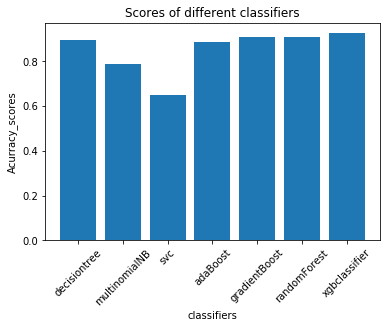

In [234]:
index=[1,2,3,4,5,6,7]
plt.bar(index,accuracy_scores)
plt.xticks(index,classifiers,rotation=45)
plt.xlabel("classifiers")
plt.ylabel("Acurracy_scores")
plt.title("Scores of different classifiers")